# Sistemas Inteligentes

## Laboratório 3 - Redução de Dimensionalidade e Regressão

Algoritmos de Redução de dimensionalidade:
- Principal Component Analysis (PCA)
- Independent Component Analysis (ICA)
- Isometric Mapping (Isomap)
- T-Distributed Stochastic Neighbor Embedding (TSNE)

Modelos de regressão linear:
- Least Squares
- Ridge
- Lasso
- Lasso Least-angle regression (LARS)
- RANdom SAmple Consensus (RANSAC)
- Theil-Sen

### Identificação do Aluno

#### Nome Completo

    Jefferson Paiva de Paula

#### RA

    11201721192

## Importação e preparação dos dados

Importe o dataset de pacientes diabéticos da biblioteca Scikit (load_diabetes) e separe os dados entre atributos (X) e saídas (y).

In [96]:
from sklearn.datasets import load_diabetes
import numpy as np
import pandas as pd

In [51]:
import warnings
warnings.filterwarnings("ignore")

In [40]:
X = load_diabetes().data
y = load_diabetes().target

Mostre os formatos da variável de atributos e da variável de saídas.

In [5]:
X.shape

(442, 10)

In [6]:
y.shape

(442,)

## Redução de Dimensionalidade

Importe e aplique as funções de redução de dimensionalidade (PCA, FastICA, Isomap e TSNE) para reduzir a dimensionalidade a apenas uma feature.

In [22]:
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.manifold import TSNE
from sklearn.manifold import Isomap

Mostre o formato da nova variável de atributos após a redução de dimensionalidade para cada algoritmo.

In [18]:
#print(len(X[0]))
#pca = PCA(n_components=len(X[0]))
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)

print(X_pca.shape)

(442, 1)


In [60]:
fastica = FastICA(n_components=1)
fastica.fit(X)
X_fastICA = fastica.transform(X)

print(X_fastICA.shape)

(442, 1)


In [25]:
tsne = TSNE(n_components=1)
tsne.fit(X)
X_TSNE = tsne.fit_transform(X)

print(X_TSNE.shape)

(442, 1)


In [24]:
isomap = Isomap(n_components=1)
isomap.fit(X)
X_Isomap = isomap.transform(X)

print(X_Isomap.shape)

(442, 1)


### Caso mais simples

Faça a separação dos dados para treinamento e teste. Reserve 20% dos dados para teste.

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.2)

Importe o regressor linear e utilize-o para gerar um modelo, então faça uma regressão com os dados de teste.

In [32]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
print(reg.score(X_test, y_test))
reg_pred = reg.predict(X_test)

0.3527955097557729


Importe as funções de erro quadrático médio (MSE) e o coeficiente de determinação (R²), então imprima o MSE e o R².

In [34]:
from sklearn.metrics import mean_squared_error, r2_score
print(mean_squared_error(y_test, reg_pred))
print(r2_score(y_test, reg_pred))

4042.606582865849
0.3527955097557729


Então exiba o gráfico de dispersão dos dados de teste e a curva de regressão gerada.

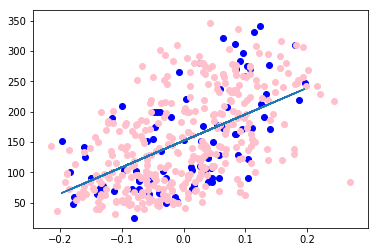

In [38]:
import matplotlib.pyplot as plt
plt.scatter(X_test, y_test, color = 'blue')
plt.scatter(X_train, y_train, color = 'pink')
plt.plot(X_test, reg_pred)

### Comparando Métodos de Redução de Dimensionalidade

Agora, a fim de comparar com outras técnicas, crie um método iterativo que realize as etapas de separação dos dados entre treinamento e teste, gere um modelo de regressão linear, faça a predição com base nos dados de testes e calcule o erro quadrático médio e o coeficiente de determinação para cada iteração. Então, calcule os valores mínimo, médio, máximo e desvio padrão para cada uma dessas duas métricas. Por fim, plote os histogramas (com 100 bins) das duas métricas. Use 10000 (dez mil) iterações.

#### PCA

In [70]:
mse_PCA = np.zeros(10000)
score_PCA = np.zeros(10000)
for i in range (0, 10000):
    X_train, X_test, y_train , y_test = train_test_split(X_pca, y, test_size = 0.2)
    reg = LinearRegression().fit(X_train, y_train)
    reg_pred = reg.predict(X_test)
    mse_PCA[i] = mean_squared_error(y_test, reg_pred)
    score_PCA[i] = r2_score(y_test, reg_pred)

In [71]:
print("valor minimo",  min(mse_PCA))
print("valor max",  max(mse_PCA))
print("valor devpad",  np.std(mse_PCA))
print("valor minimo",  min(score_PCA))
print("valor max",  max(score_PCA))
print("valor devpad", np.std(score_PCA))

valor minimo 2451.6676700626094
valor max 5980.670118024035
valor devpad 475.9351375270905
valor minimo -0.0553416987635269
valor max 0.5368240793783563
valor devpad 0.07180229455640129


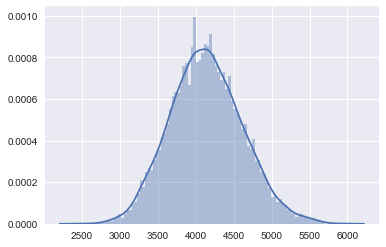

In [72]:
import seaborn as sns
sns.set()
sns.distplot(mse_PCA ,bins = 100)

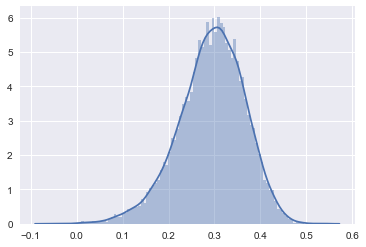

In [73]:
sns.distplot(score_PCA, bins = 100)

#### ICA


In [77]:
mse_ICA=np.zeros(10000)
score_ICA=np.zeros(10000)
for i in range(0, 10000):
    X_train, X_test, y_train, y_test= train_test_split(X_fastICA, y,test_size=0.2)
    reg=LinearRegression().fit(X_train,y_train)
    reg_pred_ICA=reg.predict(X_test)
    y_pred_ICA=reg.predict(X_test)
    mse_ICA[i]=mean_squared_error(y_test, reg_pred_ICA)
    score_ICA[i]=r2_score(y_test, reg_pred_ICA)

In [78]:
    print("valor minimo", min(mse_ICA))
    print("valor max", max(mse_ICA))
    print("valor devpad", np.std(mse_ICA))
    print("valor minimo", min(score_ICA))
    print("valor max", max(score_ICA))
    print("valor devpad", np.std(score_ICA))

valor minimo 2569.7342245078935
valor max 6219.3286811648395
valor devpad 474.6287934087248
valor minimo -0.0720549811229445
valor max 0.49433500262959473
valor devpad 0.07163060388858587


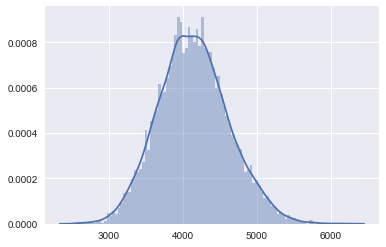

In [86]:
#sns.set()
sns.distplot(mse_ICA, bins=100)

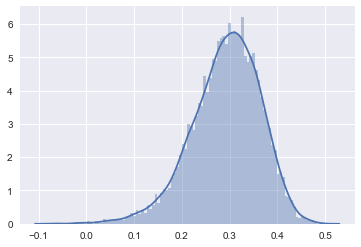

In [80]:
sns.distplot(score_ICA, bins=100)


#### Isomap

In [84]:
mse_Isomap=np.zeros(10000)
score_Isomap=np.zeros(10000)
for i in range(0, 10000):
    x_train, x_test, y_train, y_test= train_test_split(X_Isomap, y,test_size=0.2)
    reg=LinearRegression().fit(x_train,y_train)
    reg_pred_isomap=reg.predict(x_test)
    y_pred_isomap=reg.predict(x_test)
    mse_Isomap[i]=mean_squared_error(y_test, reg_pred_isomap)
    score_Isomap[i]=r2_score(y_test, reg_pred_isomap)

In [85]:
    print("valor minimo", min(mse_Isomap))
    print("valor max", max(mse_Isomap))
    print("valor devpad", np.std(mse_Isomap))
    print("valor minimo", min(score_Isomap))
    print("valor max", max(score_Isomap))
    print("valor devpad", np.std(score_Isomap))

valor minimo 3468.5556012547627
valor max 8018.122125248591
valor devpad 585.0992157735398
valor minimo -0.21823801840608947
valor max 0.16815043051239809
valor devpad 0.0480029490828817


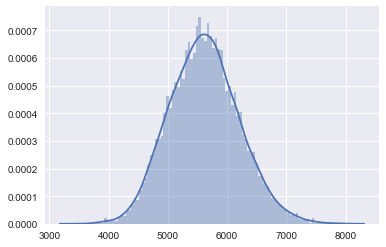

In [87]:
sns.distplot(mse_Isomap, bins=100)

#### TSNE

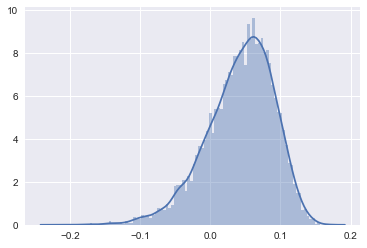

In [88]:
sns.distplot(score_Isomap, bins=100)

### Comparando modelos de Regressão

Exiba o gráfico de dispersão dos dados de teste e a curva de regressão gerada em cada caso.

In [ ]:
    plt.scatter(x, y)
    plt.plot(reg_test, reg_pred)

#### Least Squares

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.20)
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
reg_test_PCA = X_test
reg_pred_PCA = y_pred
LS_test_PCA = X_test
LS_pred_PCA = y_pred

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X_fastICA,y, test_size=0.20)
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
reg_test_ICA = X_test
reg_pred_ICA = y_pred
LS_test_ICA = X_test
LS_pred_ICA = y_pred

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X_Isomap, y, test_size=0.20)
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
reg_test_Isomap = X_test
reg_pred_Isomap = y_pred
LS_test_Isomap = X_test
LS_pred_Isomap = y_pred

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X_TSNE, y, test_size=0.20)
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
reg_test_TSNE = X_test
reg_pred_TSNE = y_pred
LS_test_TSNE = X_test
LS_pred_TSNE = y_pred

PCA


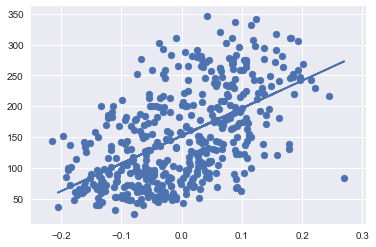

In [107]:
print("PCA")
plt.scatter(X_pca, y)
plt.plot(reg_test_PCA, reg_pred_PCA)

ICA


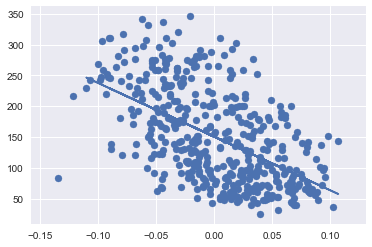

In [105]:
print("ICA")
plt.scatter(X_fastICA, y)
plt.plot(reg_test_ICA, reg_pred_ICA)

ISOMAP


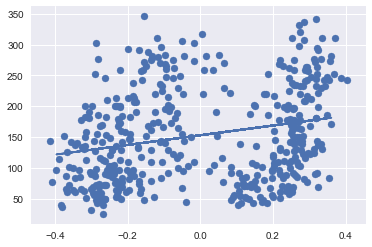

In [109]:
print("ISOMAP")
plt.scatter(X_Isomap, y)
plt.plot(reg_test_Isomap, reg_pred_Isomap)

TSNE


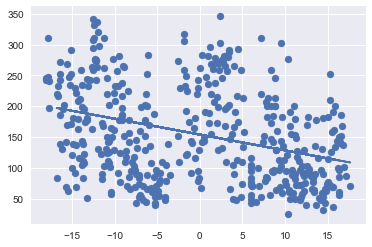

In [112]:
print("TSNE")
plt.scatter(X_TSNE, y)
plt.plot(reg_test_TSNE, reg_pred_TSNE)

#### Ridge

In [18]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X_PCA, y, test_size=0.20)
reg = Ridge()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
reg_test_pca = X_test
reg_pred_pca = y_pred
Ridge_test_pca = X_test
Ridge_pred_pca = y_pred

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_FastICA,y, test_size=0.20)
reg = Ridge()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
reg_test_ica = x_test
reg_pred_ica = y_pred
Ridge_test_ica = x_test
Ridge_pred_ica = y_pred

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_isomap, y, test_size=0.20)
reg = Ridge()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
reg_test_Isomap = X_test
reg_pred_Isomap = y_pred
Ridge_test_Isomap = X_test
Ridge_pred_Isomap = y_pred

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_tsne, y, test_size=0.20)
reg = Ridge()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
reg_test_tsne = x_test
reg_pred_tsne = y_pred
Ridge_test_tsne = x_test
Ridge_pred_tsne = y_pred

#### Lasso

In [19]:
### Escreva seu código aqui ###

#### Lasso LARS

In [20]:
### Escreva seu código aqui ###

#### Bayesian Ridge

In [21]:
### Escreva seu código aqui ###

#### RANSAC

In [22]:
### Escreva seu código aqui ###

#### Theil-Sen

In [23]:
### Escreva seu código aqui ###

### Gráfico geral comparativo

Em uma mesma figura, mostre novamente o gráfico de dispersão dos dados e plote cada um dos modelos gerados utilizando cada técnica deste laboratório. Atente-se a fazer com que o gráfico seja suficientemente autoexplicativo, então utilize diferentes cores, insira uma legenda etc.

In [24]:
plt.scatter(X_pca, y)
print('PCA')
plt.plots(LS_reg_test_pca)